# EQUITY VANILLA OPTION USING MONTE CARLO

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.185 - This build:  16 Nov 2020 at 12:53 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



# Define the Call and Put Options

In [3]:
valuation_date = Date(1, 1, 2015)

In [4]:
expiry_date = valuation_date.add_years(0.5)

In [5]:
expiry_date

01-JUL-2015

In [6]:
strike_price = 50.0

In [7]:
call_option = EquityVanillaOption(expiry_date, strike_price, OptionTypes.EUROPEAN_CALL)

In [8]:
stock_price = 50
volatility = 0.20
interest_rate = 0.05
dividend_yield = 0.0

In [9]:
discount_curve = DiscountCurveFlat(valuation_date, interest_rate)

In [2]:
dividend_curve = DiscountCurveFlat(valuation_date, dividend_yield)

NameError: name 'DiscountCurveFlat' is not defined

In [10]:
model = BlackScholes(volatility)

In [11]:
v_exact = call_option.value(valuation_date, stock_price, discount_curve, dividend_curve, model)
print(v_exact)

3.427663335316737


In [12]:
seed = 141

In [13]:
v_mc = []
v_exacts = []

num_paths = range(10000,1000000,10000)
for numPath in num_paths:
    v = call_option.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, model, numPath, seed)
    v_mc.append(v)
    v_exacts.append(v_exact)

Text(0, 0.5, 'Option Price')

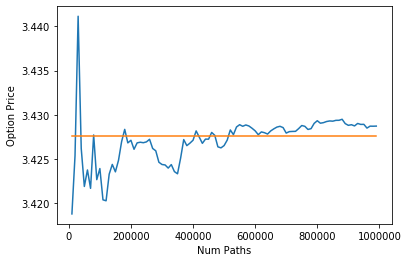

In [14]:
plt.plot(num_paths, v_mc)
plt.plot(num_paths, v_exacts)

plt.xlabel("Num Paths")
plt.ylabel("Option Price")

## Using Sobol Quasi-Random Numbers

In [38]:
v_mc = []
v_exacts = []

num_paths = range(100000,1000000,10000)
for numPath in num_paths:
    v = call_option.value_mc(valuation_date, stock_price, discount_curve, dividend_curve, model, numPath, seed, True)
    v_mc.append(v)
    v_exacts.append(v_exact)

Text(0, 0.5, 'Option Price')

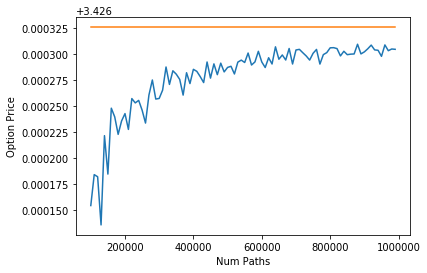

In [39]:
plt.plot(num_paths, v_mc)
plt.plot(num_paths, v_exacts)

plt.xlabel("Num Paths")
plt.ylabel("Option Price")

The convergence is impressive !

Copyright (c) 2020 Dominic O'Kane